In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Load dataset
print("=== LOADING DATA ===")
df = pd.read_csv('../rawdata/combine.csv')  # Sesuaikan path
print(f"Dataset berhasil dimuat: {df.shape[0]} baris, {df.shape[1]} kolom")

=== LOADING DATA ===
Dataset berhasil dimuat: 16000 baris, 7 kolom


In [114]:
print("\n=== BASIC DATASET INFO ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Kolom yang tersedia: {list(df.columns)}")

# Tampilkan 5 baris pertama
print("\n=== SAMPLE DATA ===")
print(df.head())

# Info dataset
print("\n=== DATA TYPES & MEMORY USAGE ===")
df.info()


=== BASIC DATASET INFO ===
Jumlah baris: 16000
Jumlah kolom: 7
Kolom yang tersedia: ['Title', 'FullText', 'Author', 'Url', 'Date', 'label', 'source']

=== SAMPLE DATA ===
                                               Title  \
0  5 Pemeran Penting Jurassic World Rebirth dan K...   
1  [HOAX] “Panglima TNI yang Baru Marsekal Hadi T...   
2  [SALAH] Warga MB Ketapang Kotawaringin Timur S...   
3  [BERITA] “Viral Karnaval TK Bercadar dan ‘Bers...   
4  Diduga Jadi Mata-mata, 2 WN China Ditangkap FB...   

                                            FullText                   Author  \
0  Jurassic World Rebirthmenjadi saga terbaru dar...  Penulis tidak ditemukan   
1  “Sudah diklarifikasi melalui akun Twitter @_TN...        Bentang Febrylian   
2  Warga\nwilayah Kecamatan MB Ketapang, Kabupate...        Bentang Febrylian   
3  “Sabtu 18 Agustus 2018, 18:28 WIB\nViral Karna...          Aribowo Sasmito   
4  FBImenangkap dua warga negara China di Amerika...               Yogi Ernes   

    

In [115]:
print("\n=== MISSING DATA ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])


=== MISSING DATA ANALYSIS ===
        Missing Count  Missing Percentage
Date             7393            46.20625
Author            114             0.71250


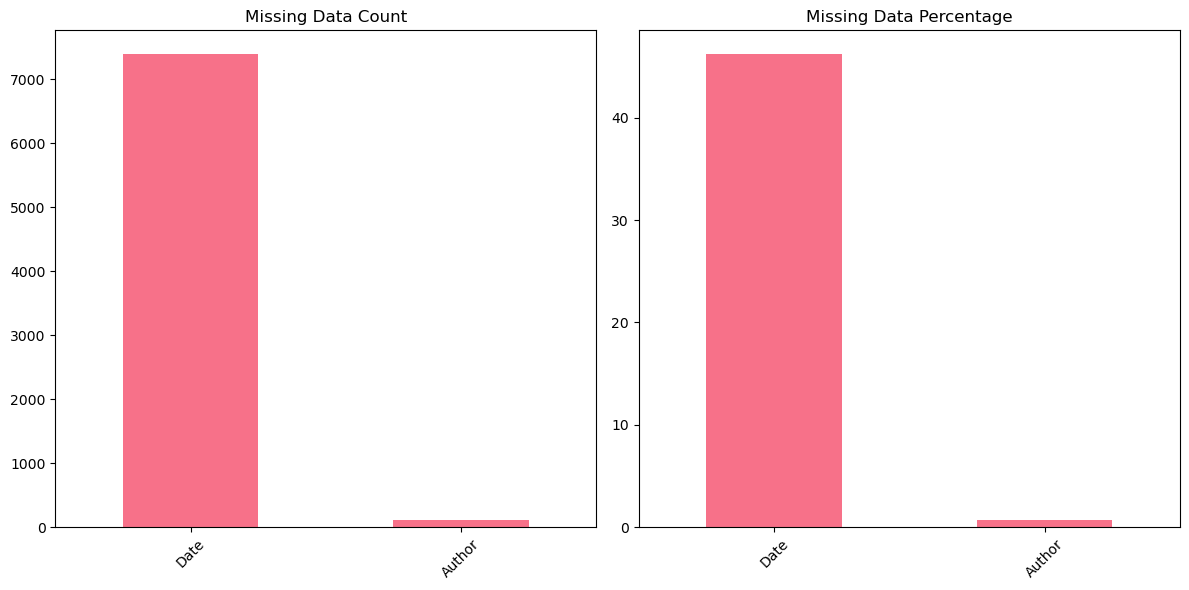

In [116]:
plt.figure(figsize=(12, 6))
missing_cols = missing_df[missing_df['Missing Count'] > 0]
if not missing_cols.empty:
    plt.subplot(1, 2, 1)
    missing_cols['Missing Count'].plot(kind='bar')
    plt.title('Missing Data Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    missing_cols['Missing Percentage'].plot(kind='bar')
    plt.title('Missing Data Percentage')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [117]:
print("\n=== LABEL DISTRIBUTION ===")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"Rasio Hoax:Valid = {label_counts[1]}:{label_counts[0]}")


=== LABEL DISTRIBUTION ===
label
0    8000
1    8000
Name: count, dtype: int64
Rasio Hoax:Valid = 8000:8000


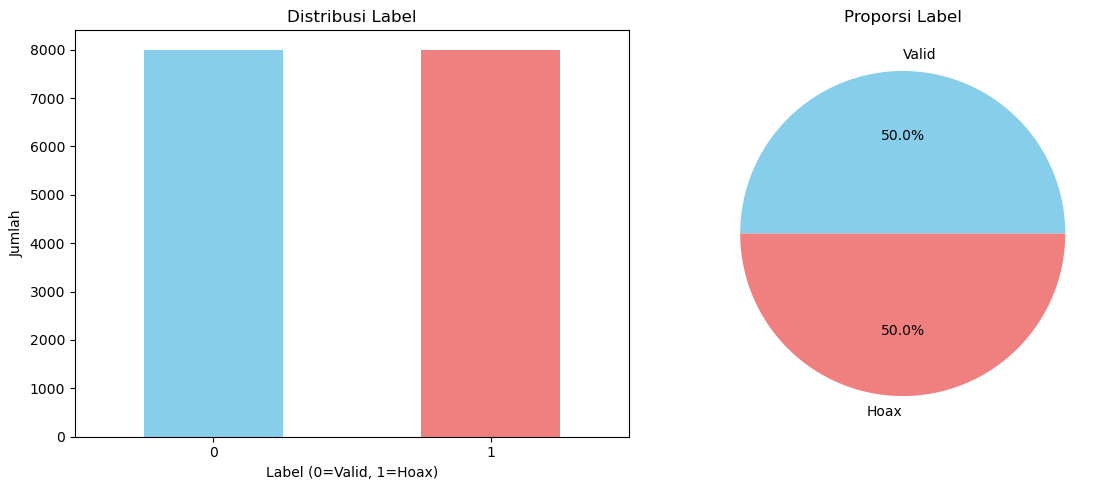

In [118]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribusi Label')
plt.xlabel('Label (0=Valid, 1=Hoax)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                               labels=['Valid', 'Hoax'], colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Label')
plt.ylabel('')

plt.tight_layout()
plt.show()


=== SOURCE ANALYSIS ===
Top 10 sources:
source
turnbackhoax                         7081
cnn                                  3423
tempo                                2318
kompas                               1652
raw_hoax.csv                          583
raw_hoax_new.csv                      336
raw_valid.csv                         300
cnnindonesia_scraped_03072025.csv      46
cnnindonesia_scraped_02072025.csv      45
kompas_scraped_02072025.csv            38
Name: count, dtype: int64

Distribusi source per label:
label                                 0  1
source                                    
cnn                                3423  0
cnnindonesia_scraped_02072025.csv    45  0
cnnindonesia_scraped_03072025.csv    46  0
cnnindonesia_scraped_08072025.csv    37  0
detik_scraped_02072025.csv           11  0
detik_scraped_03072025.csv           15  0
detik_scraped_08072025.csv           16  0
kompas                             1652  0
kompas_scraped_02072025.csv          38  0
kom

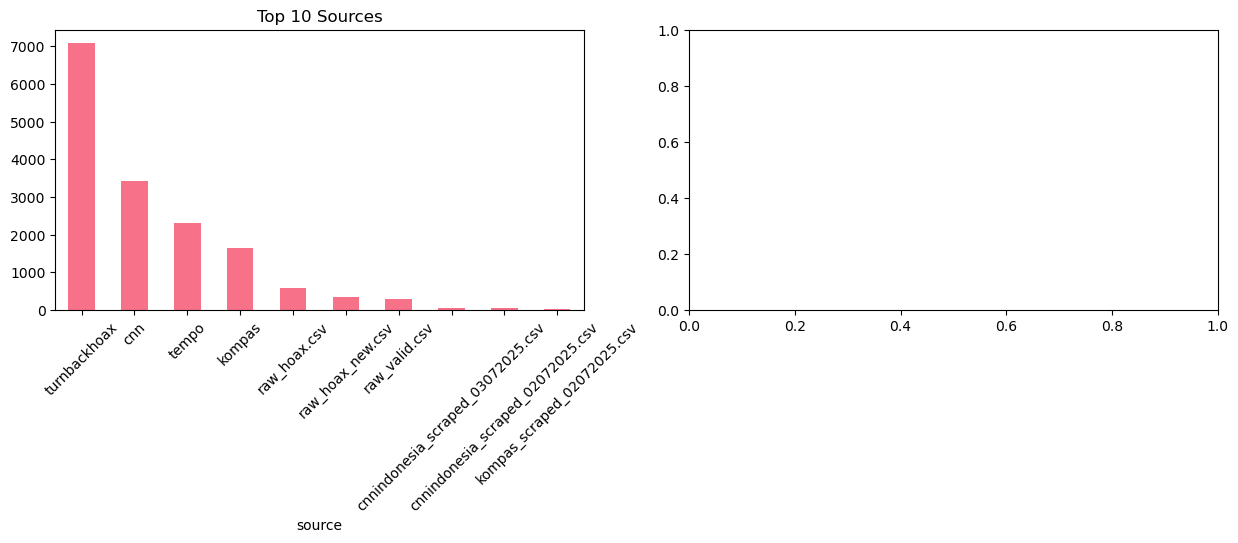

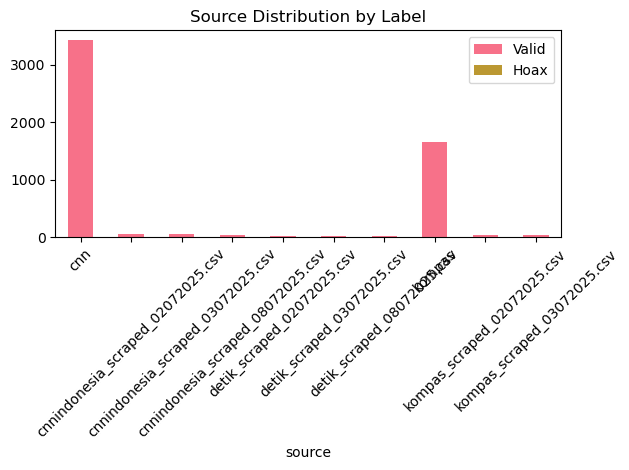

In [119]:
print("\n=== SOURCE ANALYSIS ===")
if 'source' in df.columns:
    source_counts = df['source'].value_counts()
    print("Top 10 sources:")
    print(source_counts.head(10))
    
    # Distribusi source per label
    source_label = pd.crosstab(df['source'], df['label'])
    print("\nDistribusi source per label:")
    print(source_label.head(10))
    
    # Visualisasi
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 2, 1)
    source_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Sources')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 2, 2)
    source_label.head(10).plot(kind='bar', stacked=True)
    plt.title('Source Distribution by Label')
    plt.xticks(rotation=45)
    plt.legend(['Valid', 'Hoax'])
    
    plt.tight_layout()
    plt.show()


=== TEXT LENGTH ANALYSIS ===
Statistik panjang teks:
       Title_length  FullText_length   Title_words  FullText_words
count  16000.000000     16000.000000  16000.000000    16000.000000
mean      68.067875      2702.870250      9.978938      352.018875
std       19.409258      1768.449829      2.879824      241.684967
min       16.000000        21.000000      2.000000        1.000000
25%       57.000000      1815.750000      8.000000      233.000000
50%       66.000000      2341.000000     10.000000      303.000000
75%       77.000000      3056.000000     11.000000      397.000000
max      267.000000     37619.000000     38.000000     5286.000000

Panjang teks per label:

Label 0 (Valid):
  Rata-rata panjang FullText: 2502 karakter
  Rata-rata jumlah kata: 338 kata

Label 1 (Hoax):
  Rata-rata panjang FullText: 2904 karakter
  Rata-rata jumlah kata: 366 kata


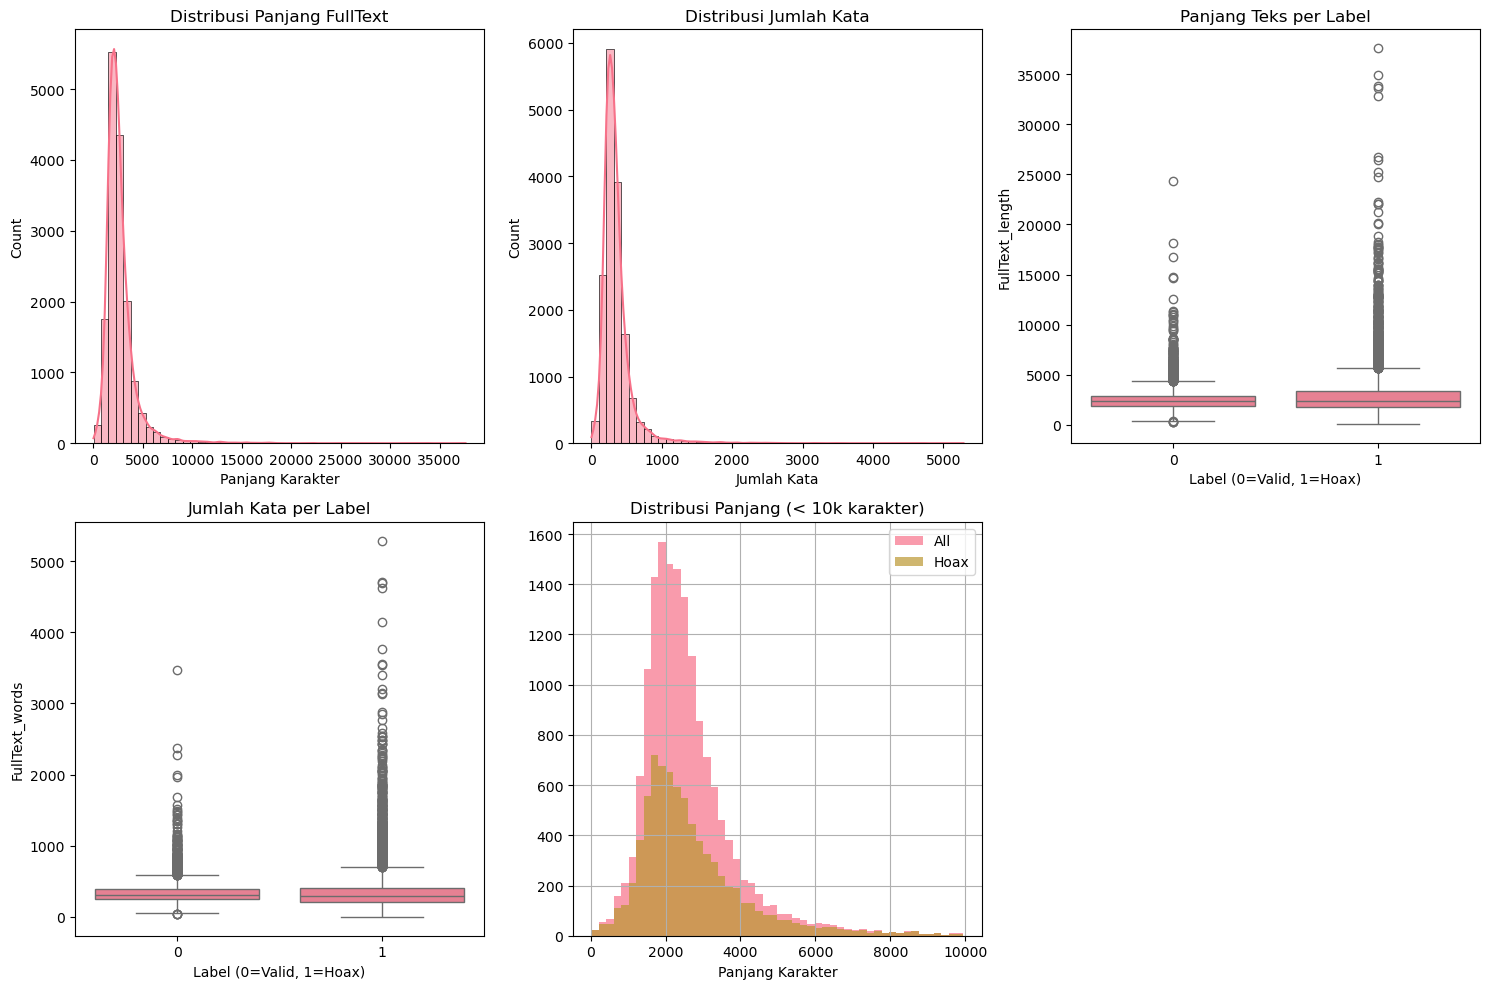

In [120]:
print("\n=== TEXT LENGTH ANALYSIS ===")
# Hitung panjang berbagai kolom teks
text_columns = ['Title', 'FullText']
for col in text_columns:
    if col in df.columns:
        df[f'{col}_length'] = df[col].astype(str).apply(len)
        df[f'{col}_words'] = df[col].astype(str).apply(lambda x: len(x.split()))

# Statistik panjang teks
length_stats = df[['Title_length', 'FullText_length', 'Title_words', 'FullText_words']].describe()
print("Statistik panjang teks:")
print(length_stats)

# Panjang teks per label
print("\nPanjang teks per label:")
for label in [0, 1]:
    print(f"\nLabel {label} ({'Valid' if label == 0 else 'Hoax'}):")
    label_data = df[df['label'] == label]
    print(f"  Rata-rata panjang FullText: {label_data['FullText_length'].mean():.0f} karakter")
    print(f"  Rata-rata jumlah kata: {label_data['FullText_words'].mean():.0f} kata")

# Visualisasi panjang teks
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['FullText_length'], bins=50, kde=True)
plt.title('Distribusi Panjang FullText')
plt.xlabel('Panjang Karakter')

plt.subplot(2, 3, 2)
sns.histplot(df['FullText_words'], bins=50, kde=True)
plt.title('Distribusi Jumlah Kata')
plt.xlabel('Jumlah Kata')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='label', y='FullText_length')
plt.title('Panjang Teks per Label')
plt.xlabel('Label (0=Valid, 1=Hoax)')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='label', y='FullText_words')
plt.title('Jumlah Kata per Label')
plt.xlabel('Label (0=Valid, 1=Hoax)')

plt.subplot(2, 3, 5)
df[df['FullText_length'] < 10000]['FullText_length'].hist(bins=50, alpha=0.7, label='All')
df[(df['label'] == 1) & (df['FullText_length'] < 10000)]['FullText_length'].hist(bins=50, alpha=0.7, label='Hoax')
plt.title('Distribusi Panjang (< 10k karakter)')
plt.xlabel('Panjang Karakter')
plt.legend()

plt.tight_layout()
plt.show()

In [121]:
if 'Date' in df.columns:
    print("\n=== TEMPORAL ANALYSIS ===")
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Day'] = df['Date'].dt.day
        
        # Distribusi per tahun
        yearly_dist = df.groupby(['Year', 'label']).size().unstack(fill_value=0)
        print("Distribusi per tahun:")
        print(yearly_dist)
        
        # Visualisasi temporal
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 2, 1)
        yearly_dist.plot(kind='bar')
        plt.title('Distribusi per Tahun')
        plt.legend(['Valid', 'Hoax'])
        
        plt.subplot(2, 2, 2)
        monthly_dist = df.groupby(['Month', 'label']).size().unstack(fill_value=0)
        monthly_dist.plot(kind='bar')
        plt.title('Distribusi per Bulan')
        plt.legend(['Valid', 'Hoax'])
        
        plt.tight_layout()
        plt.show()
        
    except:
        print("Tidak bisa memproses kolom Date")


=== TEMPORAL ANALYSIS ===
Tidak bisa memproses kolom Date



=== TEXT ANALYSIS ===

=== TOP WORDS - VALID ===
Top 20 kata untuk Valid:
  partai: 21694
  jakarta: 13936
  presiden: 13799
  indonesia: 13293
  jokowi: 13255
  politik: 13171
  ketua: 10885
  pemilu: 9983
  tak: 7194
  anies: 7118
  umum: 7048
  cnn: 7024
  dpr: 6995
  mengatakan: 6644
  pdip: 6095
  baca: 5712
  pemerintah: 5567
  persen: 5529
  negara: 5513
  calon: 5335

=== TOP WORDS - HOAX ===
Top 20 kata untuk Hoax:
  indonesia: 9780
  fakta: 6324
  the: 6218
  beredar: 6164
  bukan: 5906
  sebuah: 5728
  orang: 5609
  klaim: 5253
  presiden: 4816
  sosial: 4768
  selengkapnya: 4682
  jakarta: 4627
  satu: 4568
  jokowi: 4490
  covid: 4423
  berdasarkan: 4271
  terkait: 4264
  masyarakat: 4069
  penelusuran: 3900
  pesan: 3870


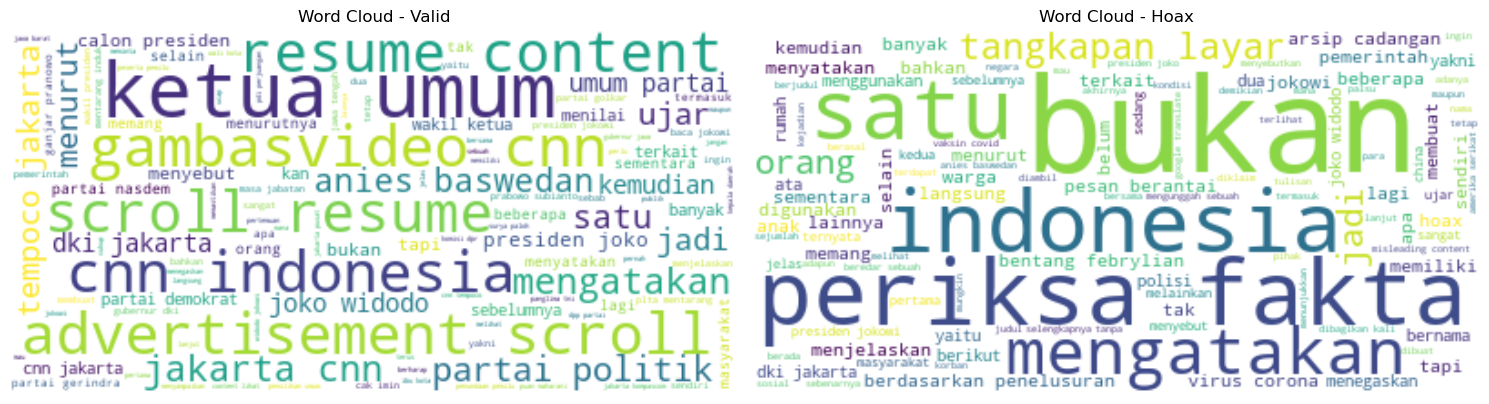

In [122]:
print("\n=== TEXT ANALYSIS ===")

def clean_text(text):
    """Bersihkan teks untuk analisis"""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    # Hapus kata-kata umum/stop words sederhana
    stop_words = [
        # Kata umum bahasa Indonesia
        'dan', 'atau', 'yang', 'ini', 'itu', 'adalah', 'akan', 'pada', 'untuk', 'di', 'ke', 'dari', 'dengan', 'oleh', 'dalam', 'tidak', 'juga', 'ada', 'telah', 'dapat', 'bisa', 'sudah', 'masih', 'harus', 'lebih', 'sama', 'antara', 'setiap', 'semua', 'saja', 'hanya', 'baru', 'lain', 'lalu', 'maka', 'jika', 'karena', 'namun', 'tetapi', 'sehingga', 'sedangkan', 'kembali', 'hingga', 'selama', 'setelah', 'sebelum', 'seperti', 'melalui', 'terhadap', 'mengenai', 'tentang', 'sekitar', 'kira', 'saat', 'waktu', 'serta', 'bahwa', 'pula', 'pun', 'lah', 'kah', 'nya', 'mu', 'ku', 'an', 'kami', 'kamu', 'mereka', 'kita', 'saya', 'anda', 'dia', 'dia', 'beliau', 'ia',
        
        # Kata yang sering muncul di berita tapi tidak informatif
        'kata', 'tersebut', 'sebagai', 'merupakan', 'menjadi', 'terjadi', 'dilakukan', 'dikatakan', 'disampaikan', 'disebutkan', 'dijelaskan', 'dinyatakan', 'dikemukakan', 'diungkapkan', 'ditekankan', 'dimaksud', 'diminta', 'diberikan', 'diterima', 'ditujukan', 'ditegaskan', 'ditambahkan', 'diharapkan', 'diketahui', 'diperlukan', 'dibutuhkan', 'dianggap', 'dipandang',
        
        # Kata yang berhubungan dengan media/sumber
        'sumber', 'referensi', 'media', 'berita', 'informasi', 'laporan', 'artikel', 'publikasi', 'konten', 'narasi', 'penjelasan', 'keterangan', 'pemberitaan', 'ulasan', 'tinjauan', 'analisis', 'kategori', 'jenis', 'tipe', 'macam', 'ragam', 'bentuk', 'cara', 'metode', 'sistem', 'proses', 'tahap', 'langkah', 'hasil', 'dampak', 'akibat', 'efek', 'konsekuensi',
        
        # Kata teknis yang sering muncul
        'foto', 'video', 'gambar', 'akun', 'facebook', 'twitter', 'instagram', 'youtube', 'website', 'link', 'url', 'html', 'jpg', 'png', 'gif', 'pdf', 'doc', 'txt',
        
        # Kata waktu umum
        'tahun', 'bulan', 'minggu', 'hari', 'jam', 'menit', 'detik', 'kemarin', 'hari', 'besok', 'sekarang', 'nanti', 'dulu', 'lama', 'baru', 'awal', 'akhir', 'mulai', 'selesai', 'berakhir', 'berlangsung', 'terjadi',
        
        # Kata penghubung dan preposisi
        'agar', 'supaya', 'biar', 'kalau', 'bila', 'apabila', 'ketika', 'sewaktu', 'selama', 'sambil', 'seraya', 'begitu', 'setelah', 'sesudah', 'sebelum', 'hingga', 'sampai', 'sejak', 'semenjak', 'selama', 'sepanjang', 'selagi', 'selama', 'demi', 'guna', 'buat', 'bagi', 'kepada', 'terhadap', 'mengenai', 'tentang', 'berkenaan', 'sehubungan', 'berkaitan', 'menyangkut', 'perihal', 'soal', 'masalah', 'urusan', 'perkara', 'hal', 'bagian', 'sisi', 'aspek', 'unsur', 'elemen', 'faktor', 'komponen',
        
        # Kata sifat umum dan tidak spesifik
        'baik', 'buruk', 'bagus', 'jelek', 'indah', 'cantik', 'tampan', 'ganteng', 'besar', 'kecil', 'tinggi', 'rendah', 'panjang', 'pendek', 'lebar', 'sempit', 'tebal', 'tipis', 'berat', 'ringan', 'kuat', 'lemah', 'cepat', 'lambat', 'mudah', 'sulit', 'gampang', 'susah', 'senang', 'sedih', 'gembira', 'kecewa', 'marah', 'takut', 'berani', 'malu', 'bangga', 'puas', 'kaya', 'miskin', 'sehat', 'sakit', 'pintar', 'bodoh', 'rajin', 'malas', 'jujur', 'bohong', 'benar', 'salah', 'betul', 'keliru'
    ]
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

# Analisis kata untuk setiap label
for label in [0, 1]:
    label_name = 'Valid' if label == 0 else 'Hoax'
    print(f"\n=== TOP WORDS - {label_name.upper()} ===")
    
    # Gabungkan teks untuk label ini
    label_text = ' '.join(df[df['label'] == label]['FullText'].dropna().apply(clean_text))
    
    # Hitung kata terbanyak
    word_freq = Counter(label_text.split()).most_common(20)
    print(f"Top 20 kata untuk {label_name}:")
    for word, count in word_freq:
        print(f"  {word}: {count}")

# Word Cloud
plt.figure(figsize=(15, 10))
for i, label in enumerate([0, 1]):
    label_name = 'Valid' if label == 0 else 'Hoax'
    label_text = ' '.join(df[df['label'] == label]['FullText'].dropna().apply(clean_text))
    
    plt.subplot(2, 2, i+1)
    if len(label_text.split()) > 0:
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(label_text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud - {label_name}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [123]:
print("\n=== STATISTICAL SUMMARY ===")
print(f"Total samples: {len(df)}")
print(f"Features: {df.shape[1]}")
print(f"Missing data: {df.isnull().sum().sum()} cells")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Cek duplikasi berdasarkan FullText
if 'FullText' in df.columns:
    duplicate_texts = df['FullText'].duplicated().sum()
    print(f"Duplicate FullText: {duplicate_texts}")

print("\n=== RECOMMENDATIONS ===")
print("1. Cek apakah ada duplikasi teks yang perlu dibersihkan")
print("2. Pertimbangkan untuk menghapus/mengisi missing data")
print("3. Analisis lebih lanjut perbedaan karakteristik hoax vs valid")
print("4. Preprocessing teks sebelum training (tokenization, stemming, dll)")
print("5. Feature engineering berdasarkan panjang teks dan kata kunci")

print("\n✅ Eksplorasi data selesai!")


=== STATISTICAL SUMMARY ===
Total samples: 16000
Features: 11
Missing data: 7507 cells
Duplicate rows: 0
Duplicate FullText: 2

=== RECOMMENDATIONS ===
1. Cek apakah ada duplikasi teks yang perlu dibersihkan
2. Pertimbangkan untuk menghapus/mengisi missing data
3. Analisis lebih lanjut perbedaan karakteristik hoax vs valid
4. Preprocessing teks sebelum training (tokenization, stemming, dll)
5. Feature engineering berdasarkan panjang teks dan kata kunci

✅ Eksplorasi data selesai!


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset gabungan (sudah di-clean dan balance)
df = pd.read_csv('../rawdata/combine.csv')

# Tampilkan contoh data
df.head()


,Title,FullText,Author,Url,Date,label,source
0,5 Pemeran Penting Jurassic World Rebirth dan K...,Jurassic World Rebirthmenjadi saga terbaru dar...,Penulis tidak ditemukan,https://www.cnnindonesia.com/hiburan/202507071...,2025/07/08 06:31:08,0,cnnindonesia_scraped_08072025.csv
1,[HOAX] “Panglima TNI yang Baru Marsekal Hadi T...,“Sudah diklarifikasi melalui akun Twitter @_TN...,Bentang Febrylian,https://turnbackhoax.id/2017/12/11/hoax-pangli...,"Desember 11, 2017",1,turnbackhoax
2,[SALAH] Warga MB Ketapang Kotawaringin Timur S...,"Warga\nwilayah Kecamatan MB Ketapang, Kabupate...",Bentang Febrylian,https://turnbackhoax.id/2020/05/13/salah-warga...,"Mei 13, 2020",1,turnbackhoax
3,[BERITA] “Viral Karnaval TK Bercadar dan ‘Bers...,"“Sabtu 18 Agustus 2018, 18:28 WIB\nViral Karna...",Aribowo Sasmito,https://turnbackhoax.id/2018/08/19/berita-vira...,"Agustus 19, 2018",1,turnbackhoax
4,"Diduga Jadi Mata-mata, 2 WN China Ditangkap FB...",FBImenangkap dua warga negara China di Amerika...,Yogi Ernes,https://news.detik.com/internasional/d-7991528...,2025/07/02 04:57:01,0,detik_scraped_02072025.csv


In [125]:
# Ukuran dataset
print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")

# Cek tipe data dan missing values
print(df.info())
print(df.isnull().sum())


Jumlah baris: 16000
Jumlah kolom: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     16000 non-null  object
 1   FullText  16000 non-null  object
 2   Author    15886 non-null  object
 3   Url       16000 non-null  object
 4   Date      8607 non-null   object
 5   label     16000 non-null  int64 
 6   source    16000 non-null  object
dtypes: int64(1), object(6)
memory usage: 875.1+ KB
None
Title          0
FullText       0
Author       114
Url            0
Date        7393
label          0
source         0
dtype: int64


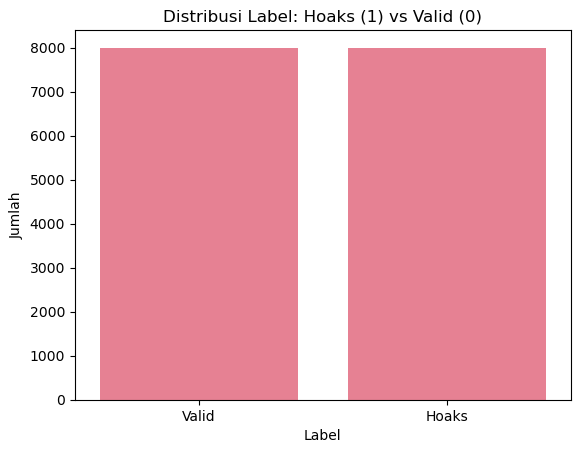

label
0    8000
1    8000
Name: count, dtype: int64

In [130]:
# Visualisasi distribusi kelas
sns.countplot(data=df, x='label')
plt.title("Distribusi Label: Hoaks (1) vs Valid (0)")

plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ["Valid", "Hoaks"])
plt.show()

# Jumlah masing-masing kelas
df['label'].value_counts()


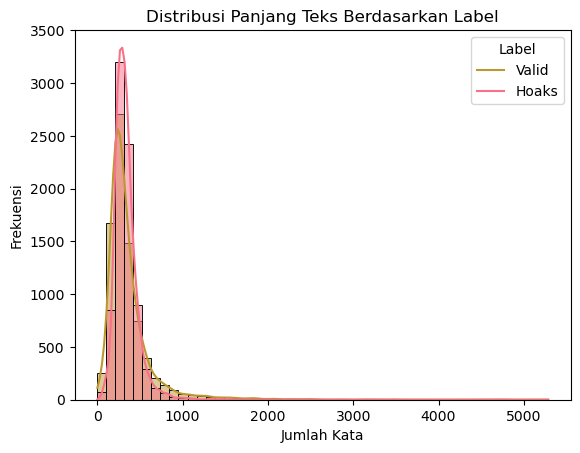

In [135]:
# Tambahkan kolom panjang teks
df['text_length'] = df['FullText'].apply(lambda x: len(str(x).split()))

# Histogram panjang teks
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title("Distribusi Panjang Teks Berdasarkan Label")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.legend(title="Label", labels=["Valid", "Hoaks"])
plt.show()


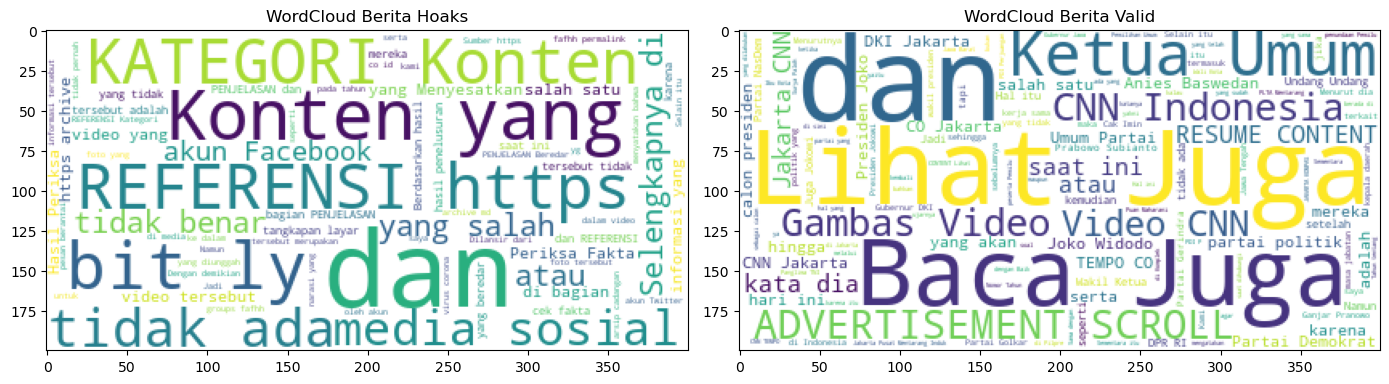

In [140]:
from wordcloud import WordCloud

# Pisahkan data hoaks dan valid
hoax_texts = " ".join(df[df['label'] == 1]['FullText'].dropna())
valid_texts = " ".join(df[df['label'] == 0]['FullText'].dropna())

# Tampilkan WordCloud
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white').generate(hoax_texts))
plt.title("WordCloud Berita Hoaks")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='white').generate(valid_texts))
plt.title("WordCloud Berita Valid")

plt.tight_layout()
plt.show()
